In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw04.ipynb")

# Homework 4: Functions, Tables, and Groups

Please complete this notebook by filling in the cells provided. Before you begin, execute the previous cell to load the provided tests.

**Helpful Resource:**
- [Python Reference](http://data8.org/fa21/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 
* [Visualizing Numerical Distributions](https://www.inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html)
* [Functions and Tables](https://www.inferentialthinking.com/chapters/08/Functions_and_Tables.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to setup the notebook by importing some helpful libraries. Each time you start your server, you will need to execute this cell again.

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. **Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!

**Deadline:**

This assignment is due Thursday, 9/23 at 11:59pm PT. Turn it in on Wednesday by 11:59pm PT for 5 extra credit points. Late work will not be accepted as per the [policies](http://data8.org/fa21/policies.html) page.


**Note: This homework has hidden tests on it. That means even though tests may say 100% passed, doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**


Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. Office hours are held Monday-Friday. The schedule appears on [http://data8.org/fa21/office-hours.html](http://data8.org/fa21/office-hours.html).

## 1. Burrito-ful San Diego

In [2]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *
import d8error

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

Tam, Margaret, and Winifred are trying to use Data Science to find the best burritos in San Diego! Their friends Irene and Maya provided them with two comprehensive datasets on many burrito establishments in the San Diego area taken from (and cleaned from): https://www.kaggle.com/srcole/burritos-in-san-diego/data

The following cell reads in a table called `ratings` which contains names of burrito restaurants, their Yelp rating, Google rating, as well as their Overall rating. The `Overall` rating is not an average of the `Yelp` and `Google` ratings, but rather it is the overall rating of the customers that were surveyed in the study above.


It also reads in a table called `burritos_types` which contains names of burrito restaurants, their menu items, and the cost of the respective menu item at the restaurant.

In [3]:
#Just run this cell
ratings = Table.read_table("ratings.csv")
ratings.show(5)
burritos_types = Table.read_table("burritos_types.csv")
burritos_types.show(5)

Name,Yelp,Google,Overall
Albertacos,3.5,3.9,3.45
Burrito Factory,4.5,4.8,3.5
Burros and Fries,3.5,4.1,3.575
Caliente Mexican Food,3.5,4.4,3.25
California Burrito Company,3.5,4.4,3.2


Name,Menu_Item,Cost
Albertacos,California,5.7
Albertacos,Carne asada,5.25
"Alberto's 623 N Escondido Blvd, Escondido, CA 92025",Carne Asada,4.59
Burrito Box,Steak with guacamole,11.5
Burrito Factory,Steak everything,7.35


**Question 1.** It would be easier if we could combine the information in both tables. Assign `burritos` to the result of joining the two tables together, so that we have a table with the ratings for every corresponding menu item from every restaurant. Each menu item has the same rating as the restaurant from which it is from. **(7 Points)**

**Note:** It doesn't matter which table you put in as the argument to the table method, either order will work for the autograder tests.

*Hint:* If you need help on using the `join` method, refer to [Python Reference](http://data8.org/fa21/python-reference.html) or [Section 8.4](https://www.inferentialthinking.com/chapters/08/4/Joining_Tables_by_Columns.html) in the textbook. This will be covered in Monday's lecture.

<!--
BEGIN QUESTION
name: q1_1
points:
 - 0
 - 0
 - 7
-->

In [4]:
burritos = ratings.join('Name', burritos_types, 'Name')
burritos.show(5)

Name,Yelp,Google,Overall,Menu_Item,Cost
Albertacos,3.5,3.9,3.45,California,5.7
Albertacos,3.5,3.9,3.45,Carne asada,5.25
Burrito Factory,4.5,4.8,3.5,Steak everything,7.35
Burros and Fries,3.5,4.1,3.575,California,7.19
Burros and Fries,3.5,4.1,3.575,Carne asada,6.89


In [5]:
try:
    print(grader.check("q1_1"))
except NameError:
    print("Please run the cells at the very top of this notebook, from the top down, then run this cell again.")

q1_1 results: All test cases passed!


<!-- BEGIN QUESTION -->

**Question 2.** Let's look at how the Yelp scores compare to the Google scores in the `burritos` table. First, assign `yelp_and_google` to a table only containing the columns `Yelp` and `Google`. Then, make a scatter plot with Yelp scores on the x-axis and the Google scores on the y-axis. **(7 Points)**

<!--
BEGIN QUESTION
name: q1_2
manual: True
-->

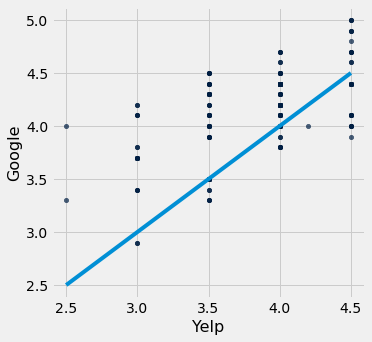

In [6]:
yelp_and_google = burritos.select('Yelp', 'Google')
yelp_and_google.scatter('Yelp', 'Google')
# Don't change/edit/remove the following line.
# To help you make conclusions, we have plotted a straight line on the graph (y=x)
plt.plot(np.arange(2.5,5,.5), np.arange(2.5,5,.5));

In [7]:
grader.check("q1_2")

q1_2 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.** Looking at the scatter plot you just made in Question 1.2, do you notice any pattern(s) (i.e. is one of the two types of scores consistently higher than the other one)? If so, describe them **briefly** in the cell below. **(7 Points)**

<!--
BEGIN QUESTION
name: q1_3
manual: True
-->

For most burritos, the Google scores are higher than Yelp scores.

<!-- END QUESTION -->



Here's a refresher on how `.group` works! You can read how `.group` works in the [textbook](https://www.inferentialthinking.com/chapters/08/2/Classifying_by_One_Variable.html), or you can view the video below. The video resource was made by a past staff member - Divyesh Chotai! 

You can also use the [Table Functions Visualizer](http://data8.org/interactive_table_functions/) to get some more hands-on experience with the `.group` function!

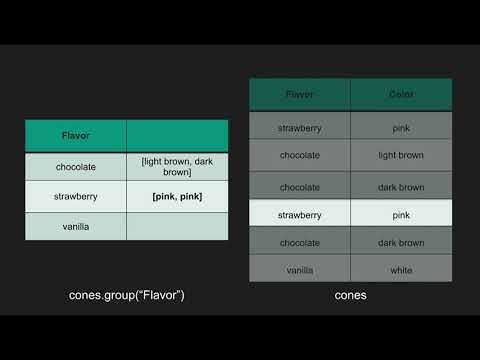

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo("HLoYTCUP0fc")

**Question 4.** There are so many types of California burritos in the `burritos` table! Winifred wants to know which type is the highest rated across all restaurants. *Note: For the sake of these questions, we are treating each menu item's rating the same as its respective restaurant's, as we do not have the rating of every single item at these restaurants. You do not need to worry about this fact, but we thought to mention it!*

Create a table that has two columns: the name of the burrito and the average overall rating of that burrito across restaurants. **In your calculations, you should compare burritos that contain the word "California".** For example, there's "California" burritos, "California breakfast" burritos, "California Surf and Turf" burritos, etc. **(7 Points)**

*Hint:* If multiple restaurants serve the "California - Chicken" burrito, what table method can we use to aggregate those together and find the average overall rating?

**Note:** You can break up the solution into multiple lines, as long as you assign the final output table to `california_burritos`! For reference however, the staff solution only used one line.

<!--
BEGIN QUESTION
name: q1_4
points:
 - 1
 - 1
 - 5
-->

In [9]:
california_burritos = burritos.select('Menu_Item', 'Overall').where(
    'Menu_Item', are.containing('California')
).group('Menu_Item', np.mean)
california_burritos

Menu_Item,Overall mean
California,3.5242
California (only cheese),4.1
California + Guac + sour cream,3.4
California - Chicken,3.45839
California - Pork Adobada,3.26429
California - Steak,3.26429
California Chipotle,4.36667
California Everything,4.1
California Everything mini,4.1
California Surf,3.66667


In [10]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 5.** Given this new table `california_burritos`, Winifred can figure out the name of the California burrito with the highest overall average rating! Assign `best_california_burrito` to a line of code that outputs the string that represents the name of the California burrito with the highest overall average rating. If multiple burritos satisfy this criteria, you can output any one of them. **(8 Points)**

<!--
BEGIN QUESTION
name: q1_5
points:
 - 0
 - 8
-->

In [11]:
best_california_burrito = california_burritos.sort('Overall mean', descending=True).column('Menu_Item').item(0)
best_california_burrito

'California Chipotle'

In [12]:
grader.check("q1_5")

q1_5 results: All test cases passed!

**Question 6.** Using the `burritos` table, assign `menu_average` to a table that has three columns that uniquely pairs the name of the restaurant, the menu item featured in the review, and the average overall score for that menu item at that restaurant. **(8 Points)**

*Hint:* Use `.group`, and remember that you can group by multiple columns. Here's an example from the [textbook](https://www.inferentialthinking.com/chapters/08/3/Cross-Classifying_by_More_than_One_Variable.html).

<!--
BEGIN QUESTION
name: q1_6
points:
 - 0
 - 8
-->

In [13]:
burritos.show(9)
menu_average = burritos.select('Name', 'Menu_Item', 'Overall').group(['Name', 'Menu_Item'], np.mean)
menu_average

Name,Yelp,Google,Overall,Menu_Item,Cost
Albertacos,3.5,3.9,3.45,California,5.7
Albertacos,3.5,3.9,3.45,Carne asada,5.25
Burrito Factory,4.5,4.8,3.5,Steak everything,7.35
Burros and Fries,3.5,4.1,3.575,California,7.19
Burros and Fries,3.5,4.1,3.575,Carne asada,6.89
Burros and Fries,3.5,4.1,3.575,Shrimp California,6.99
Caliente Mexican Food,3.5,4.4,3.25,California,6.47
Caliente Mexican Food,3.5,4.4,3.25,carne asada,5.56
Caliente Mexican Food,3.5,4.4,3.25,fried fish,5.56


/opt/conda/lib/python3.9/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


Name,Menu_Item,Overall mean
Albertacos,California,3.45
Albertacos,Carne asada,3.45
Burrito Factory,Steak everything,3.5
Burros and Fries,California,3.575
Burros and Fries,Carne asada,3.575
Burros and Fries,Shrimp California,3.575
Caliente Mexican Food,California,3.25
Caliente Mexican Food,carne asada,3.25
Caliente Mexican Food,fried fish,3.25
California Burrito Company,California,3.2


In [14]:
grader.check("q1_6")

q1_6 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 7.** Tam thinks that burritos in San Diego are cheaper (and taste better) than the burritos in Berkeley. Plot a histogram that visualizes that distribution of the costs of the burritos from San Diego in the `burritos` table. Also use the provided `bins` variable when making your histogram, so that the histogram is more visually informative. **(8 Points)**

<!--
BEGIN QUESTION
name: q1_7
manual: True
-->

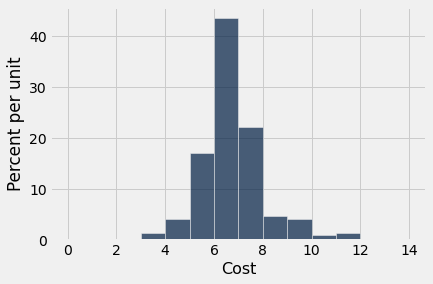

In [15]:
bins = np.arange(0, 15, 1)
# Please also use the provided bins
burritos.hist('Cost', bins=bins)

<!-- END QUESTION -->

**Question 8.** What percentage of burritos in San Diego are less than $6? Assign `burritos_less_than_6` to your answer, which should be between 0 and 100. You should only use the histogram above to answer the question. Do not use code on the table to to find the answer, just eyeball the heights and use Python to evaluate your arithmetic! **(8 Points)**

Your answer does not have to be exact, but it should be within a couple percentages of the staff answer.

<!--
BEGIN QUESTION
name: q1_8
manual: False
points:
 - 0
 - 8
-->

In [16]:
burritos_less_than_6 = 6

In [17]:
grader.check("q1_8")

q1_8 results: All test cases passed!

## 2. San Francisco City Employee Salaries

This exercise is designed to give you practice using the Table methods `pivot` and `group`. [Here](http://data8.org/fa21/python-reference.html) is a link to the Python reference page in case you need a quick refresher. The [table function visualizer](http://data8.org/interactive_table_functions/) is also a helpful tool.

Run the cell below to view a demo on how you can use pivot on a table. (Thank you to past staff Divyesh Chotai)

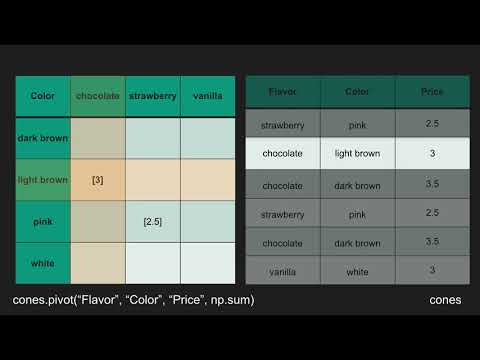

In [18]:
from IPython.display import YouTubeVideo
YouTubeVideo("4WzXo8eKLAg")

The data source we will use within this portion of the homework is [publicly provided](https://data.sfgov.org/City-Management-and-Ethics/Employee-Compensation/88g8-5mnd/data) by the City of San Francisco. We have filtered it to retain just the relevant columns and restrict the data to the calendar year 2019. Run the following cell to load our data into a table called `full_sf`.

In [19]:
full_sf = Table.read_table("sf2019.csv")
full_sf

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394,0,57312,216706
Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035,0,28671,98706
Public Protection,Adult Probation,Information Systems,IS Project Director,175742,0,60830,236572
Public Protection,Adult Probation,Information Systems,IT Operations Support Admin IV,123840,0,49429,173269
Public Protection,Adult Probation,"Payroll, Billing & Accounting",Accountant III,111816,0,46319,158135
Public Protection,Adult Probation,"Budget, Admn & Stats Analysis",Statistician,87725,0,38899,126624
Public Protection,Adult Probation,"Budget, Admn & Stats Analysis",Senior Administrative Analyst,116192,0,47651,163843


The table has one row for each of the 44,525 San Francisco government employees in 2019.

The first four columns describe the employee's job. For example, the employee in the third row of the table had a job called "IS Business Analyst-Senior". We will also call this the employee's *position* or *job title*. The job was in a Job Family called Information Systems (hence the IS in the job title), and was in the Adult Probation department that is part of the Public Protection Organization Group of the government. You will mostly be working with the `Job` column.

The next three columns contain the dollar amounts paid to the employee in the calendar year 2019 for salary, overtime, and benefits. Note that an employee’s salary does not include their overtime earnings.

The last column contains the total compensation paid to the employee. It is the sum of the previous three columns:

$$total\:compensation = Salary + Overtime + Benefits$$

For this homework, we will be using the following columns:
1. `Organization Group`: A group of departments. For example, the **Public Protection** Org. Group includes departments such as the Police, Fire, Adult Protection, District Attorney, etc.
2. `Department`: The primary organizational unit used by the City and County of San Francisco.
3. `Job`: The specific position that a given worker fills.
4. `Total Compensation`: The sum of a worker's salary, overtime, and benefits in 2019.


Run the following cell to select the relevant columns and create a new table named `sf`.

In [20]:
sf = full_sf.select("Job", "Department", "Organization Group",  "Total Compensation")
sf

Job,Department,Organization Group,Total Compensation
IS Trainer-Journey,Adult Probation,Public Protection,131391
IS Engineer-Assistant,Adult Probation,Public Protection,172520
IS Business Analyst-Senior,Adult Probation,Public Protection,162468
IS Business Analyst-Principal,Adult Probation,Public Protection,216706
IS Programmer Analyst,Adult Probation,Public Protection,98706
IS Project Director,Adult Probation,Public Protection,236572
IT Operations Support Admin IV,Adult Probation,Public Protection,173269
Accountant III,Adult Probation,Public Protection,158135
Statistician,Adult Probation,Public Protection,126624
Senior Administrative Analyst,Adult Probation,Public Protection,163843


We want to use this table to generate arrays with the job titles of the members of each **Organization Group**.

**Question 1.** Set `job_titles` to a table with two columns. The first column should be called `Organization Group` and have the name of every "Organization Group" once, and the second column should be called `Jobs` with each row in that second column containing an *array* of the names of all the job titles within that "Organization Group". Don't worry if there are multiple of the same job titles. **(8 Points)**

*Hint:* Think about how ```group``` works: it collects values into an array and then applies a function to that array. We have defined two functions below for you, and you will need to use one of them in your call to ```group```.

<!--
BEGIN QUESTION
name: q2_1
points:
 - 0
 - 0
 - 0
 - 0
 - 4
 - 4
-->

In [21]:
# Pick one of the two functions defined below in your call to group.
def function1(array):
    '''Returns the first item'''
    return array.item(0)

def function2(array):
    '''Returns the array that is passed through'''
    return array 

# Make a call to group using one of the functions above when you define job_titles
job_titles = sf.select('Organization Group', 'Job').group('Organization Group', function2).relabeled('Job function2', 'Jobs')
job_titles

Organization Group,Jobs
Community Health,['Painter Supervisor 1' 'Painter' 'Painter' ... 'Nursing ...
Culture & Recreation,['Electrician' 'Executive Secretary 2' 'Bldgs & Grounds ...
General Administration & Finance,"['Painter' 'Painter' 'Electrician' ... 'Investigator, Ta ..."
Human Welfare & Neighborhood Development,['Dept Head I' 'Administrative Analyst' 'Community Devel ...
Public Protection,['IS Trainer-Journey' 'IS Engineer-Assistant' 'IS Busine ...
"Public Works, Transportation & Commerce",['Heavy Equip Ops Asst Sprv' 'Heavy Equipment Ops Sprv' ...


In [22]:
grader.check("q2_1")

q2_1 results: All test cases passed!

#### Understanding the code you just wrote in 2.1 is important for moving forward with the class! If you made a lucky guess, take some time to look at the code, step by step.

<!-- BEGIN QUESTION -->

**Question 2.** At the moment, the `Job` column of the `sf` table is not sorted (no particular order). Would the arrays you generated in the `Jobs` column of the previous question be the same if we had sorted alphabetically instead before generating them? Explain your answer.  **(8 Points)**

**Note:** Two arrays are the **same** if they contain the same number of elements and the elements located at corresponding indexes in the two arrays are identical. An example of arrays that are NOT the same: `array([1,2]) != array([2,1])`.

<!--
BEGIN QUESTION
name: q2_2
manual: True
-->

Not Same. See the cell below.

In [23]:
job_titles_name_sorted = sf.sort('Job').select('Organization Group', 'Job').group(
    'Organization Group', function2
).relabeled('Job function2', 'Jobs')
job_titles_name_sorted

Organization Group,Jobs
Community Health,['Account Clerk' 'Account Clerk' 'Account Clerk' ... 'Un ...
Culture & Recreation,['Account Clerk' 'Account Clerk' 'Accountant II' ... 'V ...
General Administration & Finance,['ASR Operations Supervisor' 'ASR Operations Supervisor' ...
Human Welfare & Neighborhood Development,['Account Clerk' 'Account Clerk' 'Account Clerk' ... 'W ...
Public Protection,"['ACPO,JuvP, Juv Prob (SFERS)' 'Account Clerk' 'Account ..."
"Public Works, Transportation & Commerce",['Account Clerk' 'Account Clerk' 'Account Clerk' ... 'W ...


<!-- END QUESTION -->

**Question 3.** Set `department_ranges` to a table containing departments as the rows, and the organization groups as the columns. The values in the rows should correspond to a total compensation range, where range is defined as the **difference between the highest total compensation and the lowest total compensation in the department for that organization group**. **(8 Points)**

*Hint 1:* First you'll need to define a new function `compensation_range` which takes in an array of compensations and returns the range of compensations in that array.

*Hint 2:* What table function allows you to specify the rows and columns of a new table? You probably watched a video on it earlier in the homework!

<!--
BEGIN QUESTION
name: q2_3
manual: False
points:
 - 0
 - 0
 - 1
 - 7
-->

In [24]:
# Define compensation_range first
def compensation_range(array_x):
    return (max(array_x) - min(array_x))

# print(sf.labels)
department_ranges = sf.pivot('Organization Group', 'Department', values='Total Compensation', collect=compensation_range)
department_ranges

Department,Community Health,Culture & Recreation,General Administration & Finance,Human Welfare & Neighborhood Development,Public Protection,"Public Works, Transportation & Commerce"
Academy Of Sciences,0,199121,0,0,0,0
Administrative Services,0,0,478784,0,0,0
Adult Probation,0,0,0,0,303419,0
Airport Commission,0,0,0,0,0,445092
Art Commission,0,251823,0,0,0,0
Asian Art Museum,0,298230,0,0,0,0
Assessor,0,0,277385,0,0,0
Board Of Appeals,0,0,0,0,0,243582
Board Of Supervisors,0,0,293773,0,0,0
Building Inspection,0,0,0,0,0,340852


In [25]:
grader.check("q2_3")

q2_3 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 4.** Give an explanation as to why some of the row values are `0` in the `department_ranges` table from the previous question. **(8 Points)**

<!--
BEGIN QUESTION
name: q2_4
manual: True
-->

1. 对某个特定的 Department, 不是所有的 organization group 均存在
2. 给定 department and organization group, 可能只存在一个 job, 使得 range 为 0

<!-- END QUESTION -->

**Question 5.** Create a new table called `org_group_and_counts` with a column called `Organization Group` and a column called `count` for the number of departments within that organization group that have a total compensation average of above 125k dollars. If the department doesn't have any positions with a total compensation average of above 125k dollars, then it should not have a row in the final table. **(8 Points)**

*Hint 1:* Use pen and paper to draw out the intermediate tables to answer this question. This question is difficult! The variable names provided are meant to help guide the intermediate steps and general thought process.

*Hint 2:* Remember that you can group by multiple columns. Here's an example from the [textbook](https://www.inferentialthinking.com/chapters/08/3/Cross-Classifying_by_More_than_One_Variable.html).

<!--
BEGIN QUESTION
name: q2_5
manual: False
points:
 - 2
 - 2
 - 4
-->

In [26]:
# sf.show(5)
no_job_titles = sf.drop('Job')
comp_by_org_department = no_job_titles.group(['Department', 'Organization Group'], np.mean)
depts_above_125k = comp_by_org_department.where('Total Compensation mean', are.above(125e3))
org_group_and_counts = depts_above_125k.group('Organization Group')
org_group_and_counts

Organization Group,count
Culture & Recreation,2
General Administration & Finance,7
Human Welfare & Neighborhood Development,4
Public Protection,6
"Public Works, Transportation & Commerce",4


In [27]:
grader.check("q2_5")

q2_5 results: All test cases passed!

You're done with Homework 4!  

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save and Checkpoint** from the **File** menu, then **run the final cell**. 
3. Click the link to download the zip file.
4. Go to [Gradescope](https://www.gradescope.com/courses/288788) and submit the zip file to the corresponding assignment. The name of this assignment is "Homework 4 Autograder". 

**It is your responsibility to make sure your work is saved before running the last cell.**

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [28]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q1_6 results: All test cases passed!

q1_8 results: All test cases passed!

q2_1 results: All test cases passed!

q2_3 results: All test cases passed!

q2_5 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, force_save=True)